In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%autoreload 1

In [26]:
%aimport walker

ERROR:root:Line magic function `%aimport` not found.


<b>3 Layer Bethe Lattice

In [7]:
connect_mat = np.zeros((10, 10))
for i, j in [(1,2),(1,3),(1,4),(2,5),(2,6),(3,7),(3,8),(4,9),(4,10)]:
    connect_mat[i-1, j-1] = 1
    connect_mat[j-1, i-1] = 1
    
connect_mat

array([[ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [191]:
start = 0
exits = []

for i in range(10000): 

    next_loc = start


    while next_loc != 'exit':

        location = int(next_loc)
        paths = np.append(np.nonzero(connect_mat[location])[0], 'exit')

        next_loc = np.random.choice(paths)

    exits.append(location)

In [1]:
tots = []
for i in range(10):
    tots.append(exits.count(i))
    
    print('Node: {}. Frequency {}.'.format(i, tots[-1]))
          
tots

NameError: name 'exits' is not defined

In [207]:
average = np.zeros(3)

average[0] = tots[0]
average[1] = sum(tots[1:3])/len(tots[1:3])
average[2] = sum(tots[4::])/len(tots[4::])

sums = np.zeros(3)

sums[0] = tots[0]
sums[1] = sum(tots[1:3])
sums[2] = sum(tots[4::])


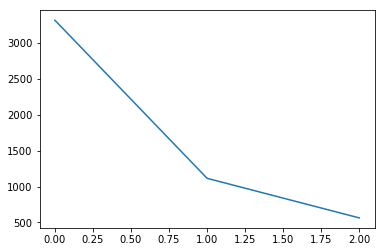

In [205]:
plt.plot(range(3), average)

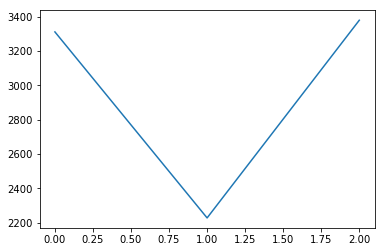

In [208]:
plt.plot(range(3), sums)

In [69]:
for i in range (3):
    print(get_depths(i))
    print(len(get_depths(i)))

[0]
1
[0, 1, 1, 1]
4
[0, 1, 1, 1, 2, 2, 2, 2, 2, 2]
10


In [67]:
def get_depths(d):

    depths = [0]

    if d:
        for i in range(1, d+1):

            depths.extend(([i]*(3*(2**(i-1)))))

    return depths

In [28]:
def bethe_adj_mat(d, z):

    nodes = int(3*(2**d) - 2)

    connect_mat = np.zeros((nodes, nodes))

    if d:

        connect_mat[1, 0] = 1
        connect_mat[0, 1] = 1

        for i in range(0, int(nodes/2)-1):
            for j in range(1, z):
                connect_mat[2*i+1+j][i] = 1
                connect_mat[i][2*i+1+j] = 1
                
    return connect_mat

Investigating the diffusion on Bethe lattice of depth 5

In [23]:
import walker

tourist = walker.Lost_Walker(0, bethe_adj_mat(3, 3))

In [25]:
tourist.walk()

NameError: name 'get_last' is not defined